In [2]:
# library
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import re

# Normality Test (must be 3/4 tests Passed Minimum)
from scipy.stats import kstest, shapiro, normaltest
from statsmodels.stats.diagnostic import lilliefors

# # ML
# from sklearn.model_selection import train_test_split
# # Classification
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# # Regression
# from statsmodels.tools.eval_measures import rmse
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# # KNN & Decision tree
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# # MinMax Scaler (Normalisation)
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# Warnings
import warnings
warnings.filterwarnings('ignore')

# **DTI-DS Capstone 2 (Statistical Analysis)**

## General Overview

1. <mark>**Background:**</mark>
    
Transjakarta is the first Bus Rapid Transit (BRT) transportation system in Southeast Asia operating since 2004 in Jakarta, Indonesia. TransJakarta was designed as a mass transportation mode to support Indonesia’s Capital city’s around the clock activities. 

With the longest track in the world (251.2 km), as well as having 260 bus stops spread across 13 corridors. Transjakarta initially operates from 05.00 - 22.00 WIB, now it operates 24 hours available on certain corridors only. With its extensive network of routes and ease of use, Transjakarta has become the leading and favorite transportation for so called “Jakartans”. 

However, there are several problems that still lingers around and thus must be handled. Problems such as sexual harassment that still often occurs to women, pickpocketing, bus crashes, schedule punctuality, accumulation of passengers at bus stops, overcrowding inside the bus itself. All stemming from overcrowding and less than optimal fleet distribution and fleet schedule.

2. <mark>**Problem Statement:**</mark>

Overcrowding has led to several of Transjakarta’s pre-existing problems aforementioned in the Background. Thus, Transjakarta wants to research on its “overcrowding” problem associated with fleet distribution and schedule to help evaluate and improve its services to passengers (“Jakartans”) 

3. <mark>**Data:**</mark>

This data is the passenger data for the month of April 2023. It initially consists of 37,900 rows (reduced to 35,476 post-preprocessing) and 22 columns. The Data Can be seen as follows:

4. <mark>**Data Analysis:**</mark>

Overcrowding can be identified through several variables that helps us measure overall quantity of passengers. These variables can also help describe the demography of our passengers in the form of customer segmentation. For this research, we are focusing on the variables that can be associated with “overcrowding”. These variables will be <mark>**highlighted**</mark> with the <mark>**arrow (->)**</mark> notation below:

#### -> Biodata:
1.	<mark>**transID:**</mark> <u>Unique transaction id for every transaction</u>
2.	<mark>**payCardID:**</mark> <u>Customers main identifier. The card customers use as a ticket for entrance and exit.</u>
3.	<mark>**payCardBank:**</mark> <u>Customers card bank issuer name</u> <mark>**-> Payment Gateway Analysis**</mark>
4.	<mark>**payCardName:**</mark> <u>Customers name that is embedded in the card.</u>
5.	<mark>**payCardSex**</mark> <u>Customers sex that is embedded in the card</u> <mark>**-> Gender Analysis**</mark>
6.	<mark>**payCardBirthDate:**</mark> <u>Customers birth year</u> <mark>**-> Customer Segmentation by Age**</mark>
#### -> Journey (Trip Details):
7.	<mark>**corridorID:**</mark> <u>Corridor ID / Route ID as key for route grouping.</u> <mark>**-> Corridor Analysis**</mark>
8.	<mark>**corridorName:**</mark> <u>Corridor Name / Route Name contains Start and Finish for each route.</u> <mark>**-> Corridor Analysis**</mark>
9.	<mark>**direction:**</mark> <u>0 for Go, 1 for Back. Direction of the route. (0: Right_address -> Left_address & 1: Left_address -> Right_address)</u> <mark>**-> In/Out Analysis**</mark>
#### -> Journey (Tap-In details):
10.	<mark>**tapInStops:**</mark> <u>Tap In (entrance) Stops ID for identifying stops name</u>
11.	<mark>**tapInStopsName:**</mark> <u>Tap In (entrance) Stops Name where customers tap in.</u> <mark>**-> Bus Stop Analysis**</mark>
12.	<mark>**tapInStopsLat:**</mark> <u>Latitude of Tap In Stops</u> <mark>**-> Geo Analysis**</mark>
13.	<mark>**tapInStopsLon:**</mark> <u>Longitude of Tap In Stops</u>
14.	<mark>**stopStartSeq:**</mark> <u>Sequence of the stops, 1st stop, 2nd stops etc. Related to direction. (the N-th startingStop to the endingStop from Right_address (direc: 0) OR Left_address (direc: 1))</u> <mark>**-> stopCount Analysis**</mark>
15.	<mark>**tapInTime:**</mark> <u>Time of tap in. Date and time</u> <mark>**-> Time-Based Analysis**</mark>
#### -> Journey (Tap-Out details):
16.	<mark>**tapOutStops:**</mark> <u>Tap Out (Exit) Stops ID for identifying stops name</u>
17.	<mark>**tapOutStopsName:**</mark> <u>Tap out (exit) Stops Name where customers tap out.</u> <mark>**-> Bus Stop Analysis**</mark>
18.	<mark>**tapOutStopsLat:**</mark> <u>Latitude of Tap Out Stops</u> <mark>**-> Geo Analysis**</mark>
19.	<mark>**tapOutStopsLon:**</mark> <u>Longitude of Tap Out Stops</u>
20.	<mark>**stopEndSeq:**</mark> <u>Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.(the N-th startingStop to the endingStop from Right_address (direc: 0) OR Left_address (direc: 1))</u> <mark>**-> stopCount Analysis**</mark>
21.	<mark>**tapOutTime:**</mark> <u>Time of tap out. Date and time</u> <mark>**-> Time-Based Analysis**</mark>
#### -> Journey (Trip Details):
22.	<mark>**payAmount:**</mark> <u>The number of what customers pay. Some are free. Some not.</u> <mark>**-> Revenue Analysis**</mark>

<br>
<br>
<br>
5. <mark>**Final Initial Hypothetical Thoughts (guiding concerns): **</mark>

Overcrowding can be best described as a phenomenon where the quantity of people exceed the threshold of collective and overall comfort of a cohort of people. To mitigate such problems. We can list the overall data analysis research findings, along with recommendations such as addressing customer segments that majorly contributes to “overcrowding”, fleet distribution and schedule that accommodate peak demand hours based on some of its busiest corridors (and its stops) whilst accommodating concerns such as female passenger safety by way of dedicated female rows on buses and female-only buses. Such implementation requires a certain degree of supervision, hence the optimal number of staff and their respective distribution along with comprehensive CCTV coverage. 

“Overcrowding” stems from congestion, and congestion does not always happen at the bus but rather the bus stops itself. This might cause certain problems such as pickpocketing and uncomfortable waiting conditions. To reduce such congestion, Transjakarta can increase its number of fleets, along with the aforementioned fleet distribution and schedule. This will also lessen the already high operating hours that might result in unexpected vehicle breakdowns, which might further worsen the problem as a delay in supply might trickle down to the whole system’s operational efficiency

In [3]:
# Import Data
df_tj = pd.read_csv('Transjakarta_cleaned.csv', sep= ',')

In [4]:
# ===== 'Transjakarta.csv'' =====
pd.set_option("display.max_columns", None)
df_tj

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,LDEA875J4U32YZ,213107623841273,emoney,Natalia Pratama,M,1964,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05823P,United Tractors 1,-6.183260,106.93243,28,2023-04-01 06:22:27,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-01 08:15:45,3500.0
1,MSNJ848P3Q44GI,4139531858845,online,Tgk. Kacung Nashiruddin,F,1997,7E,Kampung Rambutan - Ragunan,1.0,B01062P,Jln. Gabus Raya,-6.301222,106.83623,7,2023-04-01 06:54:35,B03148P,RS Jantung Binawaluya,-6.308410,106.87071,15.0,2023-04-01 07:27:31,3500.0
2,JZZV014Y9O33OV,60459139923,flazz,Zelda Thamrin,M,1972,JIS3,Harmoni - Jakarta International Stadium,0.0,P00046,Danau Agung,-6.146869,106.85805,8,2023-04-01 07:32:50,P00161,Pecenongan,-6.167710,106.82819,12.0,2023-04-01 08:16:02,3500.0
3,EVRV919Q6A86EC,4301046448643115806,brizzi,Rama Firmansyah,F,1992,5C,PGC - Juanda,0.0,P00016,BKN,-6.257751,106.87000,1,2023-04-01 09:41:03,P00033,Cawang UKI,-6.250309,106.87360,2.0,2023-04-01 10:27:36,3500.0
4,MLDJ961C1Q41OU,3567863915368369,dki,"Ciaobella Prasetyo, S.Gz",F,1988,11D,Pulo Gebang - Pulo Gadung 2 via PIK,1.0,B00396P,Gg. Aim 2,-6.200395,106.93515,13,2023-04-01 10:33:57,P00270,Walikota Jakarta Timur,-6.212540,106.94537,30.0,2023-04-01 12:12:59,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35471,RQCC152K8Z33OB,370582193494134,emoney,Tomi Winarsih,F,1997,JAK.08,Roxy - Benhil,0.0,B01364P,Jln. Marabahan Cideng,-6.172066,106.80538,2,2023-04-30 21:43:18,B02995P,PU Irigasi,-6.201479,106.81079,26.0,2023-04-30 22:02:27,0.0
35472,UDKH290G9T77LN,348952647256687,emoney,Estiawan Januar,M,1992,6M,Stasiun Manggarai - Blok M,1.0,P00068,Gatot Subroto LIPI Arah Timur,-6.226549,106.81740,6,2023-04-30 21:46:00,P00066,Gatot Subroto Jamsostek Arah Timur,-6.232602,106.82162,7.0,2023-04-30 22:09:47,3500.0
35473,LUUF688T8X16WC,30441106310287,bni,"Hasan Nugroho, M.Kom.",M,2004,D11,Depok - BKN,1.0,B02822P,Pesona Khayangan,-6.382532,106.83001,7,2023-04-30 21:48:15,B00106P,Balaikota Depok 2,-6.394973,106.82277,11.0,2023-04-30 22:57:47,3500.0
35474,WBEY632U5D57DZ,180096606431591,emoney,KH. Laksana Kuswandari,F,1993,M7,Kampung Rambutan - Monas,1.0,P00137,Monas,-6.176248,106.82286,0,2023-04-30 21:51:08,P00204,RS Harapan Bunda,-6.301956,106.86803,23.0,2023-04-30 23:23:18,3500.0


## **Descriptive Statistics**

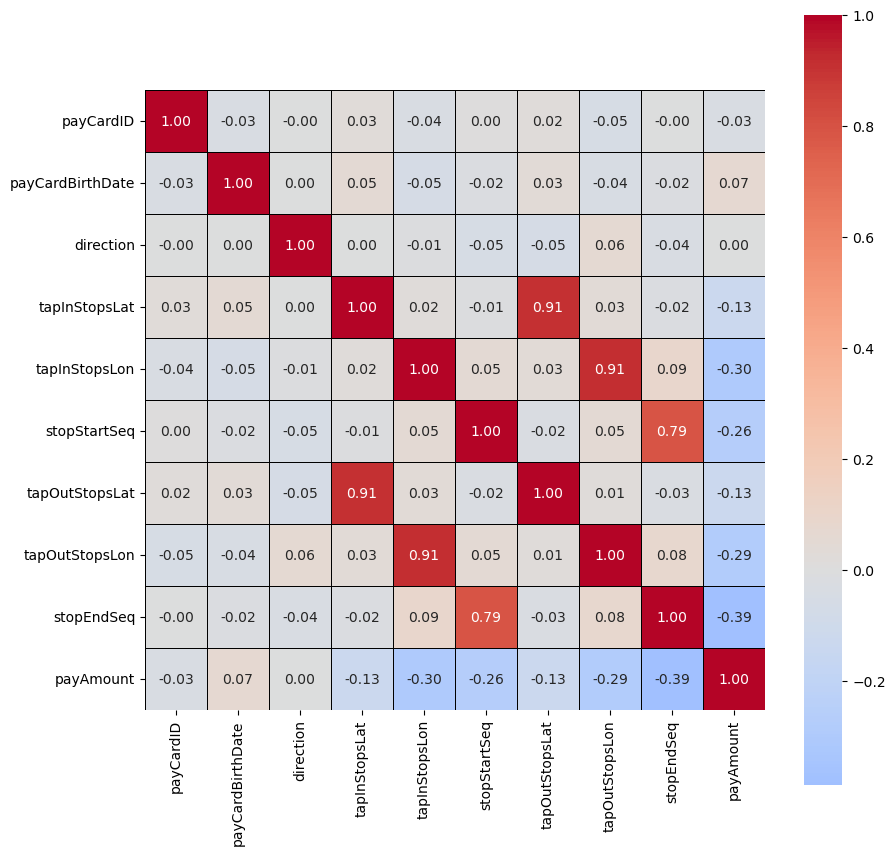

In [10]:
# For Numerical Variables only (Categorical uses Encoding -> not the Scope of Module 2)
# After Normal Distribution Test 
# -> Correlation Test (Paramteric: pearson) & (Non-Paramteric: Spearman)

# Correlation Matrix: Calculate the correlation matrix and look for high correlations (e.g., Pearson correlation coefficient > 0.8 or < -0.8).

# Compute the correlation matrix (non-parametric)
correlation_matrix = df_tj.corr(method='spearman', numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, linecolor='black', square=True)

# Display the heatmap
plt.show()

# ===== Numeical Variables List (with High Correlation) =====
# 1. tapInStopsLat with tapOutStopsLat
# 2. tapInStopsLon with tapOutStopsLon
# 3. stopStartSeq with stopEndSeq

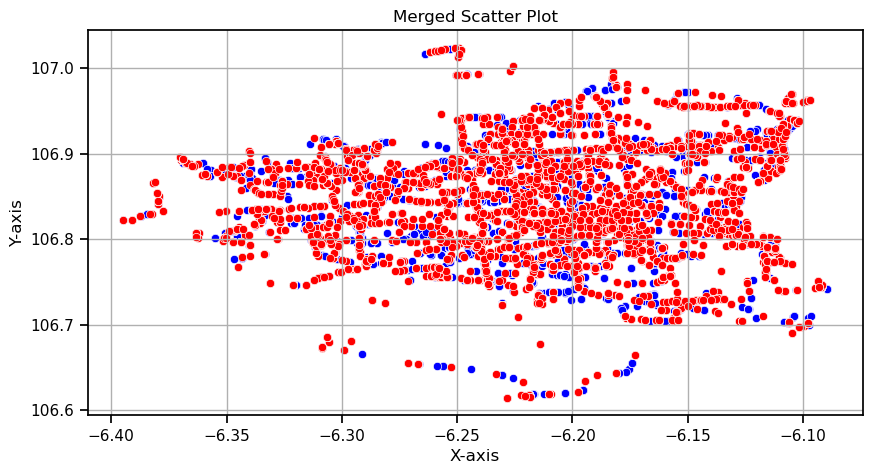

In [11]:
# ===== Numeical Variables List (with High Correlation) =====
# 1. tapInStopsLat with tapOutStopsLat
# 2. tapInStopsLon with tapOutStopsLon

# Scatter Plot (since BOTH are Coordinates)
plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1)
sns.scatterplot(data=df_tj, x='tapInStopsLat', y='tapInStopsLon', color='blue')
# Lineplot to help conenct the dots
sns.scatterplot(data=df_tj, x='tapOutStopsLat', y='tapOutStopsLon', color='red')
# switch x-axis according to df_melted['x_axis'] as index and df_melted['hyperparam_c'] as the real label value
# ax.set_xticks(df_melted['x_axis'], df_melted['hyperparam_c'])
# Add titles and labels
plt.title('Merged Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

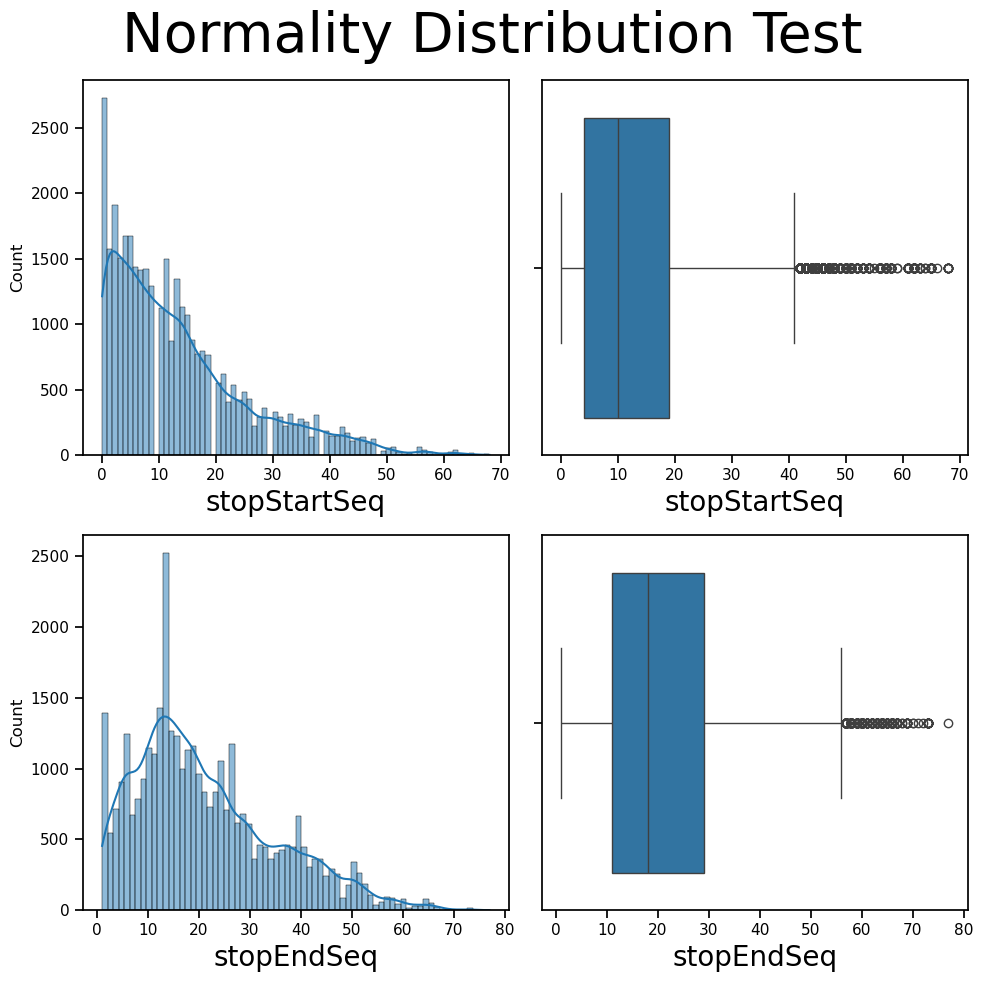

In [14]:
# Visualise Distribution Normality Test on all "Numerical" and "High-Correlation" columns (after data preprocessing)
# Using Histogram and Boxplot

# ===== Numeical Variables List (with High Correlation) =====
# 3. stopStartSeq with stopEndSeq

# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Normality Distribution Test', fontsize=40)

# ===== stopStartSeq =====
# Histogram
sns.histplot(data=df_tj, x='stopStartSeq', kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('stopStartSeq', fontsize=20)
# Box Plot
sns.boxplot(data=df_tj, x=df_tj['stopStartSeq'], orient='v', ax=axes[0, 1])
axes[0, 1].set_xlabel('stopStartSeq', fontsize=20)
# # QQ Plot
# sm.qqplot(df['age'], line='45', ax=axes[0, 2])

# ===== stopEndSeq =====
sns.histplot(data=df_tj, x='stopEndSeq', kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('stopEndSeq', fontsize=20)
# Box Plot
sns.boxplot(data=df_tj, x=df_tj['stopEndSeq'], orient='v', ax=axes[1, 1])
axes[1, 1].set_xlabel('stopEndSeq', fontsize=20)
# # QQ Plot
# sm.qqplot(df['age'], line='45', ax=axes[0, 2])

plt.tight_layout()
plt.show()

# Explanation: Both "stopStartSeq" and "stopEndSeq" have right-skew and Not Normal distribution (Non-Parametric) with a lot of Outliers
# This might be due to the fact that LESS people are visitng stops that are very far away from their starting posiiton RELATIVE to their INITIAL Direction early on in the day.

In [ ]:
# ===== ENCODING =====
# since one of our features -> "sex" -> is categorical
# We must do one-hot encoding using pd.get_dummies()
# Y (target) must be Binary -> Which 'survived' is

# Filtering to Columns needed
df_new = df[['survived', 'pclass', 'sex', 'age', 'fare']]

# Encoding
df_new_enc = pd.get_dummies(df_new, columns=['sex'])*1
df_new_enc

In [18]:
# Do Statistical test for Distribution Normality Test on all "Numerical" and "High-Correlation" columns (after data preprocessing)
# helps decide .fillna() with mean, median mode
# Using Kolmogorov-Smirnov, Lilliefors, Shapiro-Wilk, & D’Agostino and Pearson’s Test

# ===== Numeical Variables List (with High Correlation) =====
# 3. stopStartSeq with stopEndSeq

Test_Flag = 0
ks_statistics, ks_pval = kstest(df_tj['stopStartSeq'], 'norm')
shapiro_statistic, shapiro_pval = shapiro(df_tj['stopStartSeq'])
lf_statistics, lf_pval = lilliefors(df_tj['stopStartSeq'])
dp_statistics, dp_pval = normaltest(df_tj['stopStartSeq'])

# display(ks_statistics, ks_pval)
# display(shapiro_statistic, shapiro_pval)
print(" ===== stopStartSeq TEST SCORE ===== ")

print("Kolmogorov-Smirnov Test")
if ks_pval > 0.05:
    print(f"P-Value: {ks_pval}. We assume it has Normal Distribution")   
    Test_Flag += 1
else:
    print(f"P-Value: {ks_pval}. We DO NOT assume it has Normal Distribution")   
    
print("Shapiro-Wilk Test")
if shapiro_pval > 0.05:
    print(f"P-Value: {shapiro_pval}. We assume it has Normal Distribution")  
    Test_Flag += 1 
else:
    print(f"P-Value: {shapiro_pval}. We DO NOT assume it has Normal Distribution") 
    
print("LillieforsTest")
if lf_pval > 0.05:
    print(f"P-Value: {lf_pval}. We assume it has Normal Distribution")   
    Test_Flag += 1
else:
    print(f"P-Value: {lf_pval}. We DO NOT assume it has Normal Distribution") 
    
print("D’Agostino and Pearson’s Test")
if dp_pval > 0.05:
    print(f"P-Value: {dp_pval}. We assume it has Normal Distribution")   
    Test_Flag += 1
else:
    print(f"P-Value: {dp_pval}. We DO NOT assume it has Normal Distribution") 
    
# Final Conclusion
if Test_Flag >= 3:
    print(f"We assume it HAS Normal Distribution. {Test_Flag}/4 tests passed")
else:
    print(f"We assume it DOES NOT has Normal Distribution. {Test_Flag}/4 tests passed")

 ===== stopStartSeq TEST SCORE ===== 
Kolmogorov-Smirnov Test
P-Value: 0.0. We DO NOT assume it has Normal Distribution
Shapiro-Wilk Test
P-Value: 0.0. We DO NOT assume it has Normal Distribution
LillieforsTest
P-Value: 0.0009999999999998899. We DO NOT assume it has Normal Distribution
D’Agostino and Pearson’s Test
P-Value: 0.0. We DO NOT assume it has Normal Distribution
We assume it DOES NOT has Normal Distribution. 0/4 tests passed


In [19]:
# Do Statistical test for Distribution Normality Test on all "Numerical" and "High-Correlation" columns (after data preprocessing)
# helps decide .fillna() with mean, median mode
# Using Kolmogorov-Smirnov, Lilliefors, Shapiro-Wilk, & D’Agostino and Pearson’s Test

# ===== Numeical Variables List (with High Correlation) =====
# 3. stopStartSeq with stopEndSeq

Test_Flag = 0
ks_statistics, ks_pval = kstest(df_tj['stopEndSeq'], 'norm')
shapiro_statistic, shapiro_pval = shapiro(df_tj['stopEndSeq'])
lf_statistics, lf_pval = lilliefors(df_tj['stopEndSeq'])
dp_statistics, dp_pval = normaltest(df_tj['stopEndSeq'])

# display(ks_statistics, ks_pval)
# display(shapiro_statistic, shapiro_pval)
print(" ===== stopEndSeq TEST SCORE ===== ")

print("Kolmogorov-Smirnov Test")
if ks_pval > 0.05:
    print(f"P-Value: {ks_pval}. We assume it has Normal Distribution")   
    Test_Flag += 1
else:
    print(f"P-Value: {ks_pval}. We DO NOT assume it has Normal Distribution")   
    
print("Shapiro-Wilk Test")
if shapiro_pval > 0.05:
    print(f"P-Value: {shapiro_pval}. We assume it has Normal Distribution")  
    Test_Flag += 1 
else:
    print(f"P-Value: {shapiro_pval}. We DO NOT assume it has Normal Distribution") 
    
print("LillieforsTest")
if lf_pval > 0.05:
    print(f"P-Value: {lf_pval}. We assume it has Normal Distribution")   
    Test_Flag += 1
else:
    print(f"P-Value: {lf_pval}. We DO NOT assume it has Normal Distribution") 
    
print("D’Agostino and Pearson’s Test")
if dp_pval > 0.05:
    print(f"P-Value: {dp_pval}. We assume it has Normal Distribution")   
    Test_Flag += 1
else:
    print(f"P-Value: {dp_pval}. We DO NOT assume it has Normal Distribution") 
    
# Final Conclusion
if Test_Flag >= 3:
    print(f"We assume it HAS Normal Distribution. {Test_Flag}/4 tests passed")
else:
    print(f"We assume it DOES NOT has Normal Distribution. {Test_Flag}/4 tests passed")

 ===== stopEndSeq TEST SCORE ===== 
Kolmogorov-Smirnov Test
P-Value: 0.0. We DO NOT assume it has Normal Distribution
Shapiro-Wilk Test
P-Value: 0.0. We DO NOT assume it has Normal Distribution
LillieforsTest
P-Value: 0.0009999999999998899. We DO NOT assume it has Normal Distribution
D’Agostino and Pearson’s Test
P-Value: 0.0. We DO NOT assume it has Normal Distribution
We assume it DOES NOT has Normal Distribution. 0/4 tests passed


## **Conclusion (Desc Stats)**

##### AFTER HEATMAP

===== Numeical Variables List (with High Correlation) =====
1. tapInStopsLat with tapOutStopsLat
2. tapInStopsLon with tapOutStopsLon
3. stopStartSeq with stopEndSeq

##### AFTER HISTOGRAM & BOXPLOT

Explanation: Both "stopStartSeq" and "stopEndSeq" have right-skew and Not Normal distribution (Non-Parametric) with a lot of Outliers

This might be due to the fact that LESS people are visitng stops that are very far away from their starting posiiton RELATIVE to their INITIAL Direction early on in the day.

##### AFTER NORMALITY DISTRIBUTION STATISTICAL TEST 

Both stopStartSeq & stopEndSeq have Not Normal (NON-PARAMETRIC) distribution -> proven by the Visualisation that both can be considered "Right-Skew"

Both stopStartSeq & stopEndSeq DID NOT pass ANY of the Normality Distribution Stats Test -> Both have a P-Value score of <= 0.05 for all FOUR TESTS